In [1]:
import pandas as pd
import numpy as np
import random
from torchaudio import transforms
import matplotlib.pyplot as plt
from IPython.display import Audio

from dataset import AudioUtils
from utils import plot_audio_waveform

In [2]:
DATA_PATH = 'data'
METADATA_FILE = 'data/metadata_compiled.csv'

In [3]:
metadata_df = pd.read_csv(METADATA_FILE)

# Part 1: Explore the dataset through code

## a. How many samples does the dataset contain?

In [4]:
sample_count = metadata_df.shape[0]
labbled_count = metadata_df[metadata_df['status'].notna()].shape[0]
unlabelled_count = metadata_df[metadata_df['status'].isna()].shape[0]

print(f'Dataset contains {sample_count} samples in total. However out of those only {labbled_count} are labeled and {unlabelled_count} are unlabeled.')

Dataset contains 27550 samples in total. However out of those only 16224 are labeled and 11326 are unlabeled.


## b. How many classes? How many images per class? Show a histogram of the number of instances per class.

In [5]:
print('Columns in metadata file:', len(metadata_df.columns))
metadata_df.columns

Columns in metadata file: 51


Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

From the 51 cloums we only focused on the `status` column. We can see that there are 3 classes (`healthy`, `symptomatic` and `COVID-19`) in the dataset.

In [6]:
metadata_df['status'].value_counts()

healthy        12479
symptomatic     2590
COVID-19        1155
Name: status, dtype: int64

The number of images per class is shown in the histogram below.

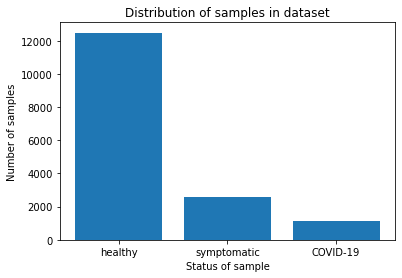

In [7]:
plt.bar(metadata_df['status'].value_counts().index, metadata_df['status'].value_counts().values)

plt.title('Distribution of samples in dataset')
plt.xlabel('Status of sample')
plt.ylabel('Number of samples')

plt.show()

## c. Play a random sample from each class.

### Healthy sample

Loaded sample with sample rate 48000 Hz and duration 8.16 seconds.


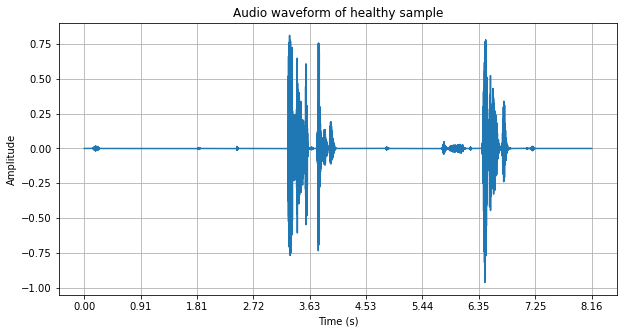

In [8]:
healty_sample_uuid = random.choice(metadata_df[metadata_df['status'] == 'healthy']['uuid'].to_list())
signal, sample_rate, info = AudioUtils.load_audio_file(healty_sample_uuid, 'data/')
signal = signal[0].numpy()

print(f'Loaded sample with sample rate {sample_rate} Hz and duration {info.num_frames / info.sample_rate:.2f} seconds.')

plot_audio_waveform(signal, sample_rate, title='Audio waveform of healthy sample')

Audio(signal, rate=sample_rate, embed=True)

### Symptomatic sample

Loaded sample with sample rate 48000 Hz and duration 6.54 seconds.


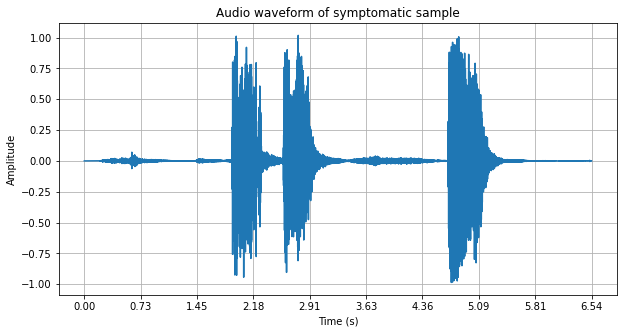

In [9]:
healty_sample_uuid = random.choice(metadata_df[metadata_df['status'] == 'symptomatic']['uuid'].to_list())
signal, sample_rate, info = AudioUtils.load_audio_file(healty_sample_uuid, 'data/')
signal = signal[0].numpy()

print(f'Loaded sample with sample rate {sample_rate} Hz and duration {info.num_frames / info.sample_rate:.2f} seconds.')

plot_audio_waveform(signal, sample_rate, title='Audio waveform of symptomatic sample')

Audio(signal, rate=sample_rate, embed=True)

### COVID-19 sample

Loaded sample with sample rate 48000 Hz and duration 9.78 seconds.


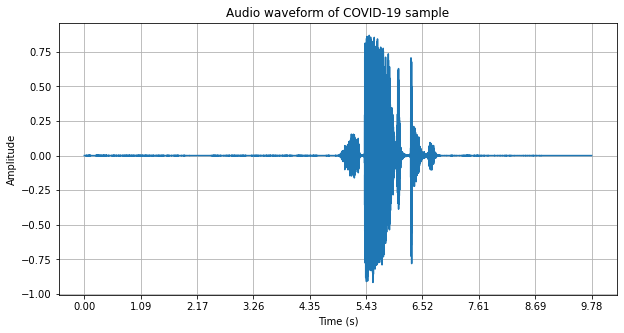

In [10]:
healty_sample_uuid = random.choice(metadata_df[metadata_df['status'] == 'COVID-19']['uuid'].to_list())
signal, sample_rate, info = AudioUtils.load_audio_file(healty_sample_uuid, 'data/')
signal = signal[0].numpy()

print(f'Loaded sample with sample rate {sample_rate} Hz and duration {info.num_frames / info.sample_rate:.2f} seconds.')

plot_audio_waveform(signal, sample_rate, title='Audio waveform of COVID-19 sample')

Audio(signal, rate=sample_rate, embed=True)

## d. Describe if/how you think the data distribution will affect training of a classifier.

The data-set distribution is not normally distributed as there is a significantly greater amount of healthy data points than with covid and symptomatic. This could potentially affect the training of the classifier if a model which assumes normal distribution is chosen as the model.

## e. Decide what part of the dataset to use; all, some classes, some samples. Motivate your choice.

During the training, we selected those samples, where the status value was labeled by a professional manually and set a threshold for the cough detected value. During the training, we tried different threshold values from `0.6` to  `0.9`. We kept all three status labels `healthy`, `symptomatic`, and `COVID-19`. (You can see the distribution of the labels in the histogram below.)

Because of the high percentage of `healthy` labels in the dataset, most of our models overfitted for the `healthy` label and only predicted `healthy` labels. That is why we always got `~75%` accuracy which is the same amount as the `healthy` labels in the dataset.

We reduced the num of `healthy` and `symptomatic` labels to equalize the number of the samples by the class to avoid predicting only `healthy` labels.


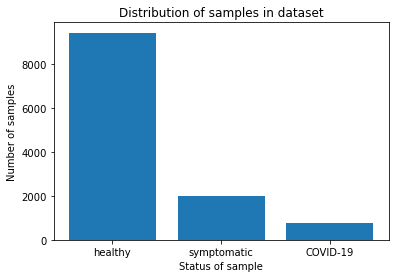

In [11]:
COUGH_DETECTED_THRESHOLD = 0.6
filtered_df = metadata_df[metadata_df['cough_detected'] > COUGH_DETECTED_THRESHOLD]

plt.bar(filtered_df['status'].value_counts().index, filtered_df['status'].value_counts().values)

plt.title('Distribution of samples in dataset')
plt.xlabel('Status of sample')
plt.ylabel('Number of samples')

plt.show()